<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/05_curso_tf_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**nota: antes de ejecutarlo todo, meter capas de data augmentation!!!!!!!!!!!!**
# IMPORTANTE!

1.)Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

2.)Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

3.)Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

4-)Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [2]:
import tensorflow as tf
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 


--2022-11-07 17:28:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  15.8MB/s    in 12s     

2022-11-07 17:29:05 (13.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip','r')
zip_ref.extractall()
zip_ref.close()

In [4]:
data_dir = '/content/10_food_classes_10_percent/'
train_dir = data_dir + 'train'
test_dir = data_dir + 'test'

In [5]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images')

There are 2 directories and 0 images
There are 10 directories and 0 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 10 directories and 0 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images


In [6]:
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical',
                                                                            batch_size = 32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
historia = model.fit(train_data_10_percent,
                     epochs = 10,
                     steps_per_epoch = len(train_data_10_percent) ,
                     validation_data = test_data_10_percent,
                     validation_steps= len(test_data_10_percent))

Epoch 1/10
24/24 [==============================] - 21s 434ms/step - loss: 189.0781 - accuracy: 0.1160 - val_loss: 15.1225 - val_accuracy: 0.1144
Epoch 2/10
24/24 [==============================] - 9s 362ms/step - loss: 4.8402 - accuracy: 0.2093 - val_loss: 2.4323 - val_accuracy: 0.1416
Epoch 3/10
24/24 [==============================] - 7s 290ms/step - loss: 1.5600 - accuracy: 0.5067 - val_loss: 2.4429 - val_accuracy: 0.1524
Epoch 4/10
24/24 [==============================] - 7s 290ms/step - loss: 1.0075 - accuracy: 0.8107 - val_loss: 2.5029 - val_accuracy: 0.1712
Epoch 5/10
24/24 [==============================] - 7s 288ms/step - loss: 0.5648 - accuracy: 0.9253 - val_loss: 2.5649 - val_accuracy: 0.1736
Epoch 6/10
24/24 [==============================] - 7s 290ms/step - loss: 0.2944 - accuracy: 0.9880 - val_loss: 2.6668 - val_accuracy: 0.1828
Epoch 7/10
24/24 [==============================] - 12s 514ms/step - loss: 0.1365 - accuracy: 0.9973 - val_loss: 2.7816 - val_accuracy: 0.1816
E

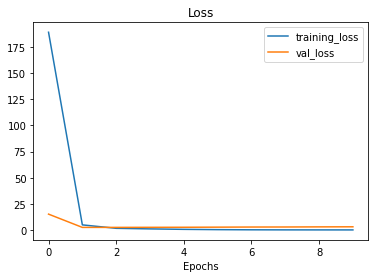

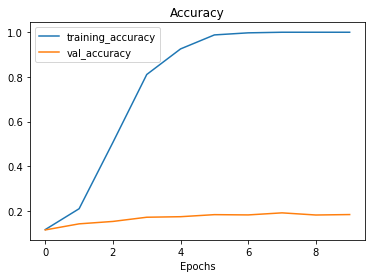

In [9]:
plot_loss_curves(historia)

In [10]:
import matplotlib.pyplot as plt
import random
class_names = ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburguer', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']
def plot_random_image(ds, model = model,batch_size = 32, class_name = random.sample(class_names, 1)):
  one = ds.take(1)
  for images, labels in one:
    rand_index = random.randint(0,batch_size-1)
    while(class_names[labels[rand_index].numpy().argmax()] != class_name):
          rand_index = random.randint(0,batch_size-1)
    plt.imshow(images[rand_index].numpy().astype("uint8"))
    title = class_names[labels[rand_index].numpy().argmax()]
    plt.xlabel(f'PREDICTION: {class_names[model.predict(tf.expand_dims(images[rand_index], axis=0)).argmax()]}')
    plt.title(title)
    # plt.axis(False)
    plt.show()

1/1 [==============================] - 0s 206ms/step


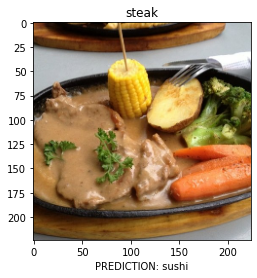

In [11]:
plot_random_image(test_data_10_percent, model,  32, 'steak')

#2.)Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

In [12]:
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
import tensorflow_hub as hub

In [13]:
def create_model(model_url, num_classes=10):
  IMAGE_SHAPE = (224,224)
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name = 'feature_extractor_layer',
                                           input_shape = IMAGE_SHAPE+(3,))
  base_model = tf.keras.applications.EfficientNetB0(include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
      tf.keras.layers.Rescaling(scale = 1./255),
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation = 'softmax', name = 'output1')
  ])
  return model, base_model

In [14]:
efficientnet_model1 = create_model(efficientnet_url, num_classes = 10)[0]
base_model = create_model(efficientnet_url,10)[1]

efficientnet_model1.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

16705208/16705208 [==============================] - 3s 0us/step


In [15]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/'  + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )
  print(f'Saving TensorBoard log files to {log_dir}')
  return tensorboard_callback

In [16]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)


In [17]:
initial_epochs = 10
history_10_percent_eff = efficientnet_model1.fit(train_data_10_percent,
                                epochs=initial_epochs,
                                validation_data=test_data_10_percent,
                                validation_steps=len(test_data_10_percent), # do less steps per validation (quicker)
                                callbacks=[create_tensorboard_callback("tensorflow_hub", "10_percent_efficientnet, 10epochs"), 
                                checkpoint_callback])


Saving TensorBoard log files to tensorflow_hub/10_percent_efficientnet, 10epochs/20221107-173126
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.8787 - accuracy: 0.3987
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 23s 468ms/step - loss: 1.8787 - accuracy: 0.3987 - val_loss: 1.2880 - val_accuracy: 0.7532
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.0655 - accuracy: 0.7908
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 424ms/step - loss: 1.0597 - accuracy: 0.7933 - val_loss: 0.8439 - val_accuracy: 0.8320
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7592 - accuracy: 0.8302
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 374ms/step - loss: 0.7506 - accuracy: 0.8333 - val_loss: 0.6786 - val_accura

In [18]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "Efficient net feature extraction, MODEL:10 classes food 10% data" \
  --description "First 10 epochs of transfer learning with efficientnetb0" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=Ya9HtnQkMe8TfCT00VZQtf8GS36aoU&prompt=consent&access_type=off

In [19]:
efficientnet_model1.load_weights(checkpoint_path)
loaded_weights_model_results = efficientnet_model1.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 79ms/step - loss: 0.4342 - accuracy: 0.8764


# 3.)Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [20]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [21]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [22]:
fine_tune_epochs = 20
history_finetunning_20 = efficientnet_model1.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data_10_percent,
                                               initial_epoch=history_10_percent_eff.epoch[-1], # start from previous last epoch
                                               validation_steps=len(test_data_10_percent),
                                               callbacks=[create_tensorboard_callback("tensorflow_hub", "10_percent_fine_tune_20capas_10percent")])

Saving TensorBoard log files to tensorflow_hub/10_percent_fine_tune_20capas_10percent/20221107-173500
Epoch 10/20
24/24 [==============================] - 10s 347ms/step - loss: 0.2583 - accuracy: 0.9627 - val_loss: 0.4246 - val_accuracy: 0.8808
Epoch 11/20
24/24 [==============================] - 9s 348ms/step - loss: 0.2348 - accuracy: 0.9640 - val_loss: 0.4175 - val_accuracy: 0.8808
Epoch 12/20
24/24 [==============================] - 9s 348ms/step - loss: 0.2146 - accuracy: 0.9707 - val_loss: 0.4096 - val_accuracy: 0.8788
Epoch 13/20
24/24 [==============================] - 9s 347ms/step - loss: 0.1988 - accuracy: 0.9747 - val_loss: 0.4039 - val_accuracy: 0.8832
Epoch 14/20
24/24 [==============================] - 10s 394ms/step - loss: 0.1828 - accuracy: 0.9800 - val_loss: 0.3980 - val_accuracy: 0.8828
Epoch 15/20
24/24 [==============================] - 8s 341ms/step - loss: 0.1695 - accuracy: 0.9787 - val_loss: 0.3934 - val_accuracy: 0.8832
Epoch 16/20
24/24 [===================

#4-)Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [23]:
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [24]:
fine_tune_epochs = 30
history_finetunning_30 = efficientnet_model1.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data_10_percent,
                                               initial_epoch=history_finetunning_20.epoch[-1], # start from previous last epoch
                                               validation_steps=len(test_data_10_percent),
                                               callbacks=[create_tensorboard_callback("tensorflow_hub", "10_percent_fine_tune_30capas_10percent")])

Saving TensorBoard log files to tensorflow_hub/10_percent_fine_tune_30capas_10percent/20221107-173656
Epoch 20/30
24/24 [==============================] - 9s 344ms/step - loss: 0.1113 - accuracy: 0.9933 - val_loss: 0.3755 - val_accuracy: 0.8828
Epoch 21/30
24/24 [==============================] - 9s 389ms/step - loss: 0.1044 - accuracy: 0.9947 - val_loss: 0.3729 - val_accuracy: 0.8828
Epoch 22/30
24/24 [==============================] - 8s 345ms/step - loss: 0.0988 - accuracy: 0.9960 - val_loss: 0.3721 - val_accuracy: 0.8820
Epoch 23/30
24/24 [==============================] - 10s 391ms/step - loss: 0.0932 - accuracy: 0.9973 - val_loss: 0.3694 - val_accuracy: 0.8820
Epoch 24/30
24/24 [==============================] - 11s 449ms/step - loss: 0.0884 - accuracy: 0.9987 - val_loss: 0.3691 - val_accuracy: 0.8832
Epoch 25/30
24/24 [==============================] - 13s 536ms/step - loss: 0.0833 - accuracy: 0.9987 - val_loss: 0.3689 - val_accuracy: 0.8812
Epoch 26/30
24/24 [==================

#Como el modelo estaba overfitted desde el modelo 2 ya todos los demas no pueden mejorar. USAR DATA AUG!!